In [1]:
#Import and read the dataset
import numpy as np
import pandas as pd
data=pd.read_csv(r"C:\Users\k.navadeepreddy\Downloads\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
X=data.iloc[:,:-1].fillna(data.mean()).values
y=data.iloc[:,-1].dropna().values

In [3]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [4]:
#import the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0,bootstrap=False,n_estimators=500)

In [5]:
#parameter tuning
from sklearn.model_selection import GridSearchCV,StratifiedKFold
parameters={'max_depth':[2,3,4,5,6,8,10],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf':[2,3],
            'max_features':['log2','sqrt',None]}
stkf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
gridsearchcv=GridSearchCV(model,parameters,cv=stkf,scoring='accuracy',n_jobs=-1,verbose=3)
gridsearchcv.fit(X_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(bootstrap=False, n_estimators=500,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4, 5, 10]},
             scoring='accuracy', verbose=3)

In [6]:
#making the predictions
predictions=gridsearchcv.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print(cm)

[[23  4]
 [ 2 32]]


In [15]:
#Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9016393442622951


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<Axes: >

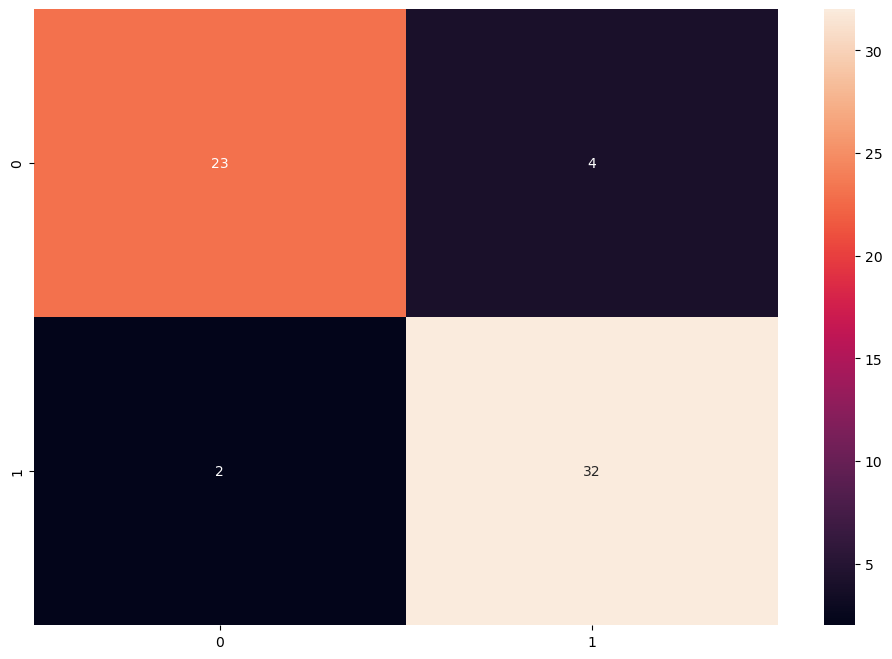

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)